<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_07_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망
---


## 핵심 키워드
---
- 심층 신경망
- 렐루 함수
- 옵티마이저


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [32]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 은닉층 hidden layer
---
- 신경망 모델 입력층과 출력충 사이에 밀집층 추가
- 이 밀집층을 은닉층이라고 하며 여러개 추가 가능
- 은닉층에는 활성화 적용 추가
- 활성화 함수는 시그모이드등의 함수 사용


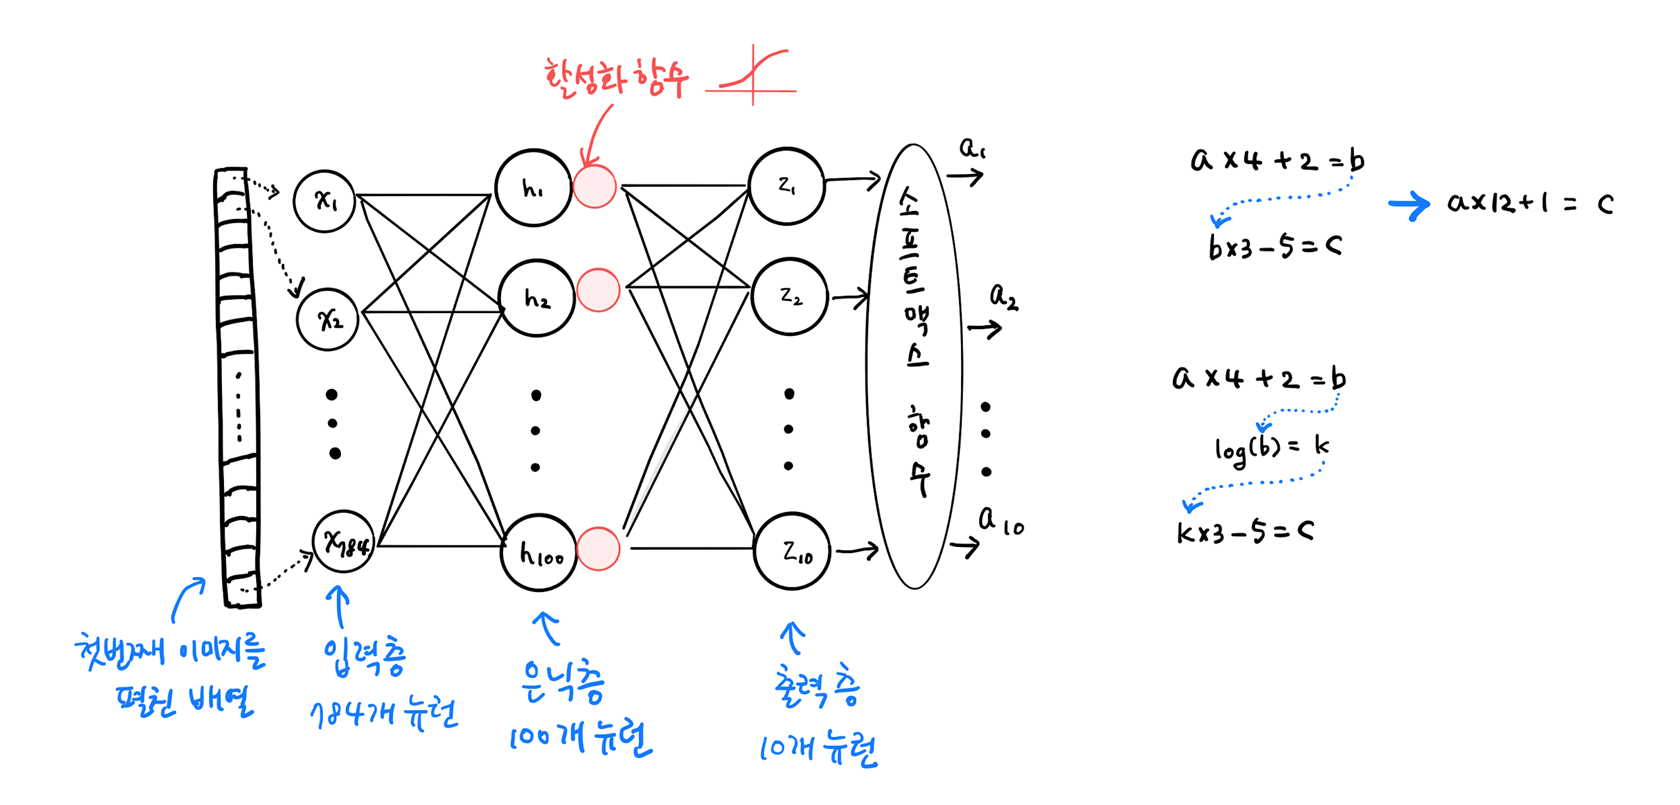

In [33]:
# 패션 MNIST 데이터 로드
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [34]:
from sklearn.model_selection import train_test_split

# 2차원 배열 1원으로 변환 
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

# 훈련 세트 테스트 세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [35]:
# 은닉층   활성화 함수, input_shape 입력층 개수
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
# 출력층  클래스 개수, 활성화 홤수
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 Deep Neural Networ DNN 만들기
---
- 인공 신경망의 강력함은 층을 추가햐여 입력 데이터에 대해 연속적인 학습을 진행하는 것
- 층이 증가한다는 것은 복잡도가 높아지는 것

In [36]:
# Sequential 클래스에 추가
model = keras.Sequential([dense1, dense2])

In [37]:
# summary() 유용한 정보 확인 
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- None : 샘플의 갯수가 아직 미정이라는 뜻
- 훈련 데이터를 입력하면 데이터를 한 번에 모두 사용하지 않고 나누어서 여러 번에 걸쳐서 경사하강법 수행 => 미니배치 경사 하강법

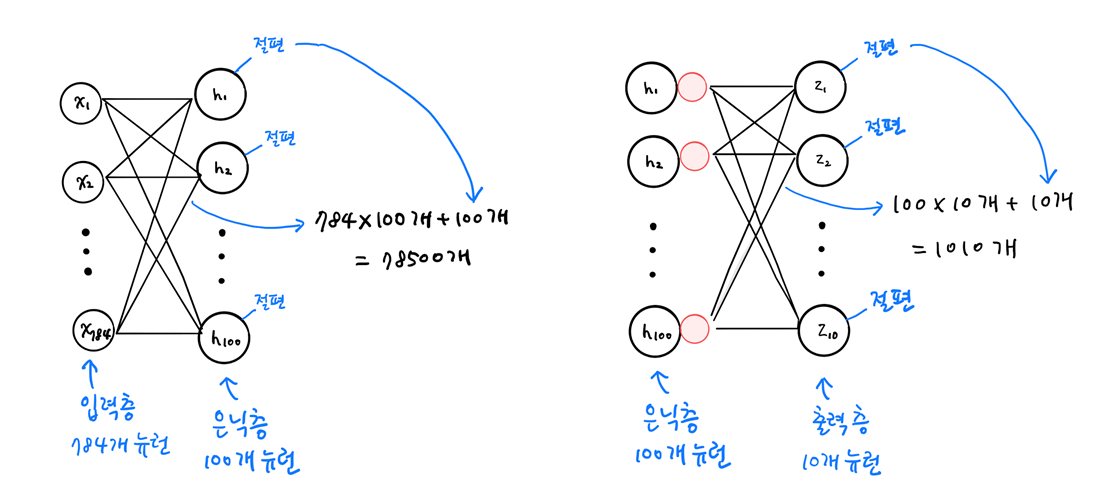

## 층을 추가하는 다른 방법
---


- **Sequential 클래스 생성자에 직접 전달**

In [38]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [39]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


- **Sequential 클래스의 add() 메서드로 추가**

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 100)               78500     
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [42]:
# 사전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5628 - accuracy: 0.8073
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4075 - accuracy: 0.8522
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3741 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3509 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3335 - accuracy: 0.8784


## 렐루 ReLU 활성화 함수
---

### 시그모이드 함수
---
- 초창기 인공 신경망에 많이 사용된 활성화 함수
- 왼쪽, 오른쪽 끝으로 갈수록 그래프가 누워있어 빠르게 올바른 출력을 내지 못함
- 그레이디언트 소실과 폭주 문제 

### 렐루 함수
---
- 입력이 양수인 경우 그냥 통과시키고 음수일 경루 0으로 출력
- max(0, z), 0보다 크면 z출력, 0보다 작으면 0출력
- 이미지 처리에 좋은 성능을 낸다고 알려져 있음

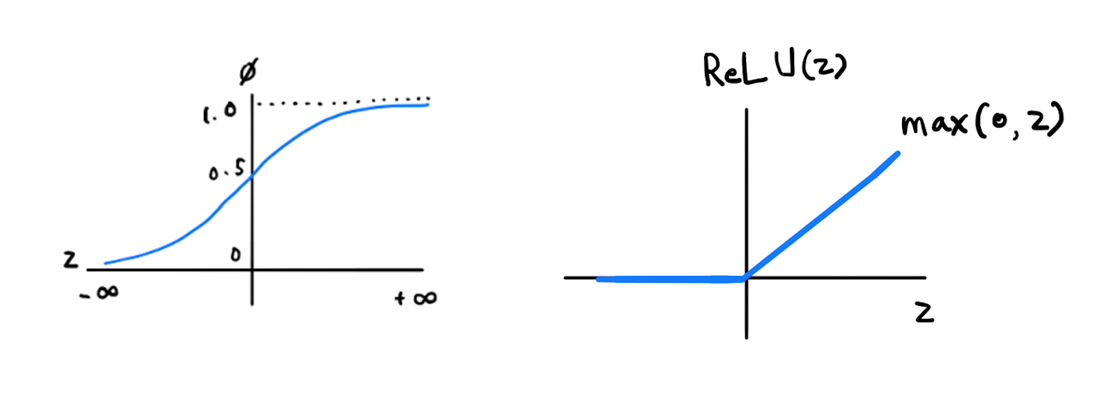

**Flatten 층**
- 넘파이 reshape()로 처리했던 1차원으로 만들어주는 역할을 하는 층
- 인공 신경망의 성능에 기여하는 바는 없음

In [43]:
model = keras.Sequential()
# Flatten  층
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               78500     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [45]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
 979/1500 [==================>...........] - ETA: 1s - loss: 0.5805 - accuracy: 0.7936

In [ ]:
model.evaluate(val_scaled, val_target)

## 인공 신경망의 하이퍼 파라미터
---
- 인공 신경망은 많은 하이퍼파라미터가 있음
- 은닉층의 개수
- 뉴런의 개수
- 활성화 함수
- 층의 종류 : 밀집층, 하성곱층 등..
- 미니배치 개수 : 기본 32개
- 에포크 횟수
- compile() 옵티마이저, 손실함수, 평가지표 등




## 옵티마이저
---
- compile()의 경사 하강법 알고리즘 종류 : 기본 RMSprop
- RMSprop의 학습률도 하이퍼 파라미터
- 별도의 옵티마이저의 클래스로 생성 가능
- 다양한 옵티마이저가 있음


### 확률적 경사 하강법 SDG 클래스
---
- 학습률 learning_rate 기본값 0.01
- 모멘텀 최적화 momentum 기본값 0,  0보다 크면 그레디언트를 가속도 처럼 사용, 보통 0.9이상 지정
- 네스테로프 모멘텀 최적화 nesterov 기본값 False, 모멘텀 최적화 사용 시 True로 지정하면 모멘텀 최적화를 2번 반복 계산
- 대부분의 경우 네스테로프 모멘텀 최적화가 기본 경사 하강법보다 나은 성능을 발휘 함


### 적응적 학습률 adaptive learning rate
---
- 모델이 최적점 가까이 갈수록 학습률을 낮추는 방법으로 안정적으로 최적점에 수렴할 가능성이 높아짐
- 학습률 매개변수 튜닝의 비용을 줄여주는 장점
- 대표적으로 RMSprop, Adagrad 클래스
- 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam 클래스
- 3개 클래스이 learning_rate 기본값은 0.001
- Adam은 처음에 시도해 볼 좋은 알고리즘 

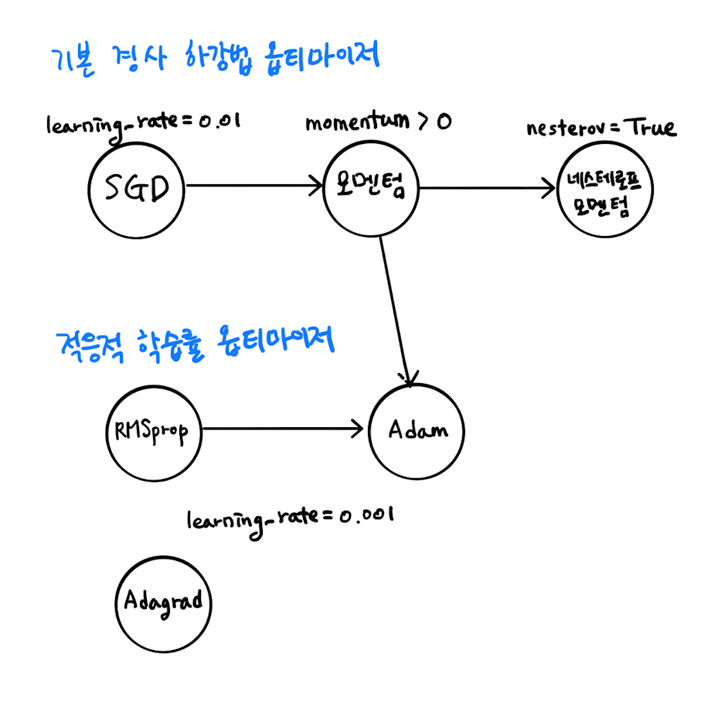

In [ ]:
# compile()에 지정 optimizer='sgd'
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

In [ ]:
# compile()에 클래스를 만덜어 지정 지정 SGD()
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

In [ ]:
#  SGD 클래스에 학습률 지정 기본 0.01
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

In [ ]:
# 모멘텀 최적화 momentum optimization
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

In [ ]:
# 네스테로프 모멘텀 최적화 nesterov momentum optimization
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

In [ ]:
# 적응적 학습률 adagrad 
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)



In [ ]:
# 적응적 학습률 RMSprop
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)



In [ ]:
# 모멘텀 최적화 +  RMSprop => Adam
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

- RMSprop을 사용하는 기본 설정보다 조금더 나은 성능 발휘